# Initial examples

In [1]:
from QG_functions import *

import numpy as np
import pandas as pd

from pymatgen.core.structure import Structure
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
from pymatgen.io.ase import AseAtomsAdaptor
from pymatgen.core.periodic_table import Element
from pymatgen.io.cif import *

from ase.visualize import view


from pymatgen.io.ase import AseAtomsAdaptor
import sys

import re
import shutil as sh
import pickle
from tqdm import tqdm


import copy
from sklearn.metrics import mean_squared_error 

#import dataframe_image as dfi

from scipy import constants
from scipy.spatial import KDTree, distance_matrix

import matplotlib.pyplot as plt

import itertools
from itertools import chain

from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error as mse


k_b = constants.physical_constants['Boltzmann constant in eV/K'][0]
# print(k_b)
def vview(structure):
    view(AseAtomsAdaptor().get_atoms(structure))

np.seterr(divide='ignore')
plt.style.use('tableau-colorblind10')

import seaborn as sns
import time
# from QG_functions import *

## MgCaSrF

In [85]:
CaF2 = Structure.from_file('data/structures/CaF2.cif')
CaF2_charges = []
for site in CaF2:
    CaF2_charges.append(site.as_dict()['species'][0]['oxidation_state'])
CaF2 = Structure(CaF2.lattice,CaF2.atomic_numbers,CaF2.frac_coords) # To avoid having the species called Ca0, Ca1 etc...

In [86]:
for an, line in zip(CaF2.atomic_numbers,CaF2.cart_coords):
    print(an, 'core', line[0], line[1], line[2])

20 core 0.0 0.0 0.0
20 core -1.688803838062887e-16 2.75802597 2.75802597
20 core 2.75802597 0.0 2.75802597
20 core 2.75802597 2.75802597 3.377607676125774e-16
9 core 1.3790129849999997 4.1370389549999995 1.3790129850000001
9 core 1.3790129849999997 4.1370389549999995 4.1370389549999995
9 core 1.379012985 1.379012985 4.1370389549999995
9 core 1.379012985 1.379012985 1.379012985
9 core 4.1370389549999995 4.1370389549999995 4.137038955
9 core 4.1370389549999995 4.1370389549999995 1.3790129850000004
9 core 4.1370389549999995 1.379012985 1.3790129850000001
9 core 4.1370389549999995 1.379012985 4.137038955


In [87]:
SpacegroupAnalyzer(CaF2).get_primitive_standard_structure()

Structure Summary
Lattice
    abc : 3.9004377321512105 3.9004377321512105 3.9004377321512105
 angles : 59.99999999999999 59.99999999999999 59.99999999999999
 volume : 41.958992289963156
      A : np.float64(-1.688803838062887e-16) np.float64(2.75802597) np.float64(2.75802597)
      B : np.float64(2.75802597) np.float64(0.0) np.float64(2.75802597)
      C : np.float64(2.75802597) np.float64(2.75802597) np.float64(3.377607676125774e-16)
    pbc : True True True
PeriodicSite: Ca (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]
PeriodicSite: F (4.137, 4.137, 4.137) [0.75, 0.75, 0.75]
PeriodicSite: F (1.379, 1.379, 1.379) [0.25, 0.25, 0.25]

In [6]:
# EWALD
ewald_matrix = compute_ewald_matrix(CaF2)

Computing real space: 100%|██████████| 12/12 [00:00<00:00, 12.13it/s]


In [ ]:
ewald_matrix_charges = calculate_ewald_matrix_charges(ewald_matrix,CaF2_charges)

In [21]:
np.sum(ewald_matrix_charges)

np.float64(-121.50902629551034)

In [41]:
vview(CaF2)

2025-04-10 08:21:03.488 python[61801:24108081] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-10 08:21:03.488 python[61801:24108081] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [43]:
len(SpacegroupAnalyzer(CaF2).get_space_group_operations())

192

In [ ]:
# BUCKINGHAM
buckingham_dict = {'Ca-F':[1293.6,   0.2990,   0.0],
                   'F-F':[22764.0 , 0.1490,  27.88]}
np.sum(compute_buckingham_matrix(CaF2,buckingham_dict,R_max=25))

Buckingham matrix: 100%|██████████| 12/12 [00:15<00:00,  1.29s/it]


np.float64(11.987011332205034)

In [40]:
compute_buckingham_matrix(CaF2,buckingham_dict,R_max=25)

Buckingham matrix: 100%|██████████| 12/12 [00:00<00:00, 46.31it/s]


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.43992378,
         0.43992378,  0.43992378,  0.43992378,  0.43992378,  0.43992378,
         0.43992378,  0.43992378],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.43992378,
         0.43992378,  0.43992378,  0.43992378,  0.43992378,  0.43992378,
         0.43992378,  0.43992378],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.43992378,
         0.43992378,  0.43992378,  0.43992378,  0.43992378,  0.43992378,
         0.43992378,  0.43992378],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.43992378,
         0.43992378,  0.43992378,  0.43992378,  0.43992378,  0.43992378,
         0.43992378,  0.43992378],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        -0.13198396, -0.03533104, -0.13198396, -0.03533104, -0.13198396,
        -0.03533104, -0.0203839 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -

In [38]:
CaMgF = copy.deepcopy(CaF2)
CaMgF[0] = 'Mg'

In [39]:
CaMgF

Structure Summary
Lattice
    abc : 5.51605194 5.51605194 5.51605194
 angles : 90.0 90.0 90.0
 volume : 167.83596915985262
      A : np.float64(5.51605194) np.float64(0.0) np.float64(3.377607676125774e-16)
      B : np.float64(-3.377607676125774e-16) np.float64(5.51605194) np.float64(3.377607676125774e-16)
      C : np.float64(0.0) np.float64(0.0) np.float64(5.51605194)
    pbc : True True True
PeriodicSite: Mg (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]
PeriodicSite: Ca (-1.689e-16, 2.758, 2.758) [0.0, 0.5, 0.5]
PeriodicSite: Ca (2.758, 0.0, 2.758) [0.5, 0.0, 0.5]
PeriodicSite: Ca (2.758, 2.758, 3.378e-16) [0.5, 0.5, 0.0]
PeriodicSite: F (1.379, 4.137, 1.379) [0.25, 0.75, 0.25]
PeriodicSite: F (1.379, 4.137, 4.137) [0.25, 0.75, 0.75]
PeriodicSite: F (1.379, 1.379, 4.137) [0.25, 0.25, 0.75]
PeriodicSite: F (1.379, 1.379, 1.379) [0.25, 0.25, 0.25]
PeriodicSite: F (4.137, 4.137, 4.137) [0.75, 0.75, 0.75]
PeriodicSite: F (4.137, 4.137, 1.379) [0.75, 0.75, 0.25]
PeriodicSite: F (4.137, 1.379, 1.379) [

## Exhaustive search


In [53]:
# READ CRYSTAL OUTPUT
def extract_ca_occupation_vectors(filepath, num_sites=8, output_csv=None):
    """
    Extract binary vectors for CA occupation from a structured output file.

    Parameters:
        filepath (str): Path to the file to parse.
        num_sites (int): Number of sites to consider (default is 8).
        output_csv (str or None): Path to save the CSV (optional).
    
    Returns:
        pd.DataFrame: DataFrame of binary vectors.
    """
    with open(filepath, "r") as file:
        lines = file.readlines()

    vectors = []

    for line in lines:
        if line.strip().startswith("CA"):
            # Extract site indices from the CA line
            indices = line.strip().split()[1:]
            indices = [int(i) for i in indices if i.isdigit()]
            vector = np.zeros(num_sites, dtype=int)
            for idx in indices:
                if 1 <= idx <= num_sites:
                    vector[idx - 1] = 1
            vectors.append(vector)

    df = pd.DataFrame(vectors, columns=[f"Site_{i+1}" for i in range(num_sites)])
    
    if output_csv:
        df.to_csv(output_csv, index=False)
        print(f"Saved CSV to {output_csv}")

    return df

In [54]:
# Example usage:
df_ca = extract_ca_occupation_vectors("data/crystal/caf2_confcount_short.out", output_csv=None)
binary_occ = df_ca.values

In [60]:
SpacegroupAnalyzer(CaF2).get_primitive_standard_structure()

Structure Summary
Lattice
    abc : 3.9004377321512105 3.9004377321512105 3.9004377321512105
 angles : 59.99999999999999 59.99999999999999 59.99999999999999
 volume : 41.958992289963156
      A : np.float64(-1.688803838062887e-16) np.float64(2.75802597) np.float64(2.75802597)
      B : np.float64(2.75802597) np.float64(0.0) np.float64(2.75802597)
      C : np.float64(2.75802597) np.float64(2.75802597) np.float64(3.377607676125774e-16)
    pbc : True True True
PeriodicSite: Ca (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]
PeriodicSite: F (4.137, 4.137, 4.137) [0.75, 0.75, 0.75]
PeriodicSite: F (1.379, 1.379, 1.379) [0.25, 0.25, 0.25]

In [70]:
with open("data/crystal/GULP/CaF2_prim_super2/gulp_input.gin","r") as f:
    gulp_input = f.readlines()

In [71]:
gulp_input

['opti fbfgs conp property phon comp\n',
 'vectors\n',
 '     0.000     5.340     5.340\n',
 '     5.340     0.000     5.340\n',
 '     5.340     5.340     0.000\n',
 '0 0 0 0 0 0\n',
 'cartesian\n',
 'Ca core  0.000000000000E+00  0.000000000000E+00  0.000000000000E+00\n',
 'Ca core -2.670100500000E+00 -2.670100500000E+00  0.000000000000E+00\n',
 'Ca core -2.670100500000E+00  0.000000000000E+00 -2.670100500000E+00\n',
 'Ca core -5.340201000000E+00 -2.670100500000E+00 -2.670100500000E+00\n',
 'Ca core  0.000000000000E+00 -2.670100500000E+00 -2.670100500000E+00\n',
 'Ca core -2.670100500000E+00 -5.340201000000E+00 -2.670100500000E+00\n',
 'Ca core -2.670100500000E+00 -2.670100500000E+00 -5.340201000000E+00\n',
 'Ca core -5.340201000000E+00 -5.340201000000E+00 -5.340201000000E+00\n',
 'F  core -1.335050250000E+00 -1.335050250000E+00 -1.335050250000E+00\n',
 'F  core  1.335050250000E+00  1.335050250000E+00 -1.335050250000E+00\n',
 'F  core  1.335050250000E+00 -1.335050250000E+00  1.3350502

In [72]:
# WRITE GULP INPUT
for i,bv in enumerate(binary_occ):
    gulp_input_tmp = copy.deepcopy(gulp_input)
    indices = np.where(bv == 0)[0]
    for idx in indices:
        gulp_input_tmp[7+idx] = 'Mg' + gulp_input_tmp[7+idx][2:]
    # print(gulp_input_tmp)
    folder = f'data/crystal/GULP/CaF2_prim_super2/CaF2_prim_super2_{i}'
    os.makedirs(folder, exist_ok=True)
    with open(os.path.join(folder,'gulp_klmc.gin'),'w') as f:
        f.writelines(gulp_input_tmp)
    print(f'cd CaF2_prim_super2_{i}')
    print('/work/e05/e05/bcamino/klmc/KLMC3-libgulp-6.1.2/Src/_build_libgulp/gulp.x')
    print('cd ..')


cd CaF2_prim_super2_0
/work/e05/e05/bcamino/klmc/KLMC3-libgulp-6.1.2/Src/_build_libgulp/gulp.x
cd ..
cd CaF2_prim_super2_1
/work/e05/e05/bcamino/klmc/KLMC3-libgulp-6.1.2/Src/_build_libgulp/gulp.x
cd ..
cd CaF2_prim_super2_2
/work/e05/e05/bcamino/klmc/KLMC3-libgulp-6.1.2/Src/_build_libgulp/gulp.x
cd ..
cd CaF2_prim_super2_3
/work/e05/e05/bcamino/klmc/KLMC3-libgulp-6.1.2/Src/_build_libgulp/gulp.x
cd ..
cd CaF2_prim_super2_4
/work/e05/e05/bcamino/klmc/KLMC3-libgulp-6.1.2/Src/_build_libgulp/gulp.x
cd ..
cd CaF2_prim_super2_5
/work/e05/e05/bcamino/klmc/KLMC3-libgulp-6.1.2/Src/_build_libgulp/gulp.x
cd ..
cd CaF2_prim_super2_6
/work/e05/e05/bcamino/klmc/KLMC3-libgulp-6.1.2/Src/_build_libgulp/gulp.x
cd ..
cd CaF2_prim_super2_7
/work/e05/e05/bcamino/klmc/KLMC3-libgulp-6.1.2/Src/_build_libgulp/gulp.x
cd ..
cd CaF2_prim_super2_8
/work/e05/e05/bcamino/klmc/KLMC3-libgulp-6.1.2/Src/_build_libgulp/gulp.x
cd ..
cd CaF2_prim_super2_9
/work/e05/e05/bcamino/klmc/KLMC3-libgulp-6.1.2/Src/_build_libgulp/gul

In [ ]:
# READ THE INITIAL AND FINAL ENERGY
import os
import re
import numpy as np

# Define the parent folder where all subfolders are
parent_dir = 'data/crystal/GULP/CaF2_prim_super2'
subfolders = [f for f in os.listdir(parent_dir) if os.path.isdir(os.path.join(parent_dir, f))]

initial_energy = []
final_energy = []

for folder in sorted(subfolders):  # sort optional
    gout_path = os.path.join(parent_dir, folder, 'gulp_klmc.gout')
    if not os.path.isfile(gout_path):
        continue

    with open(gout_path, 'r') as file:
        eV_energies = []
        for line in file:
            if 'Total lattice energy' in line and 'eV' in line:
                match = re.search(r'=\s*(-?\d+\.\d+)', line)
                if match:
                    eV_energies.append(float(match.group(1)))

        if len(eV_energies) >= 2:
            initial_energy.append(eV_energies[0])
            final_energy.append(eV_energies[1])
        else:
            print(f"Not enough eV energy entries in {gout_path}")

# Convert to NumPy arrays
initial_energy = np.array(initial_energy)
final_energy = np.array(final_energy)

print("Initial energies:", initial_energy)
print("Final energies:", final_energy)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2014851385.py, line 37)

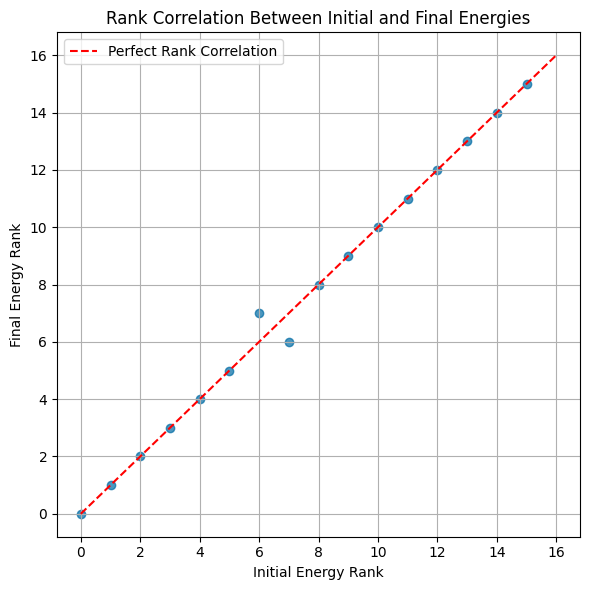

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Compute ranks (argsort gives indices to sort, argsort again gives the ranks)
initial_ranks = np.argsort(np.argsort(initial_energy))
final_ranks = np.argsort(np.argsort(final_energy))

plt.figure(figsize=(6, 6))
plt.scatter(initial_ranks, final_ranks, alpha=0.7)
plt.plot([0, len(initial_energy)], [0, len(final_energy)], 'r--', label='Perfect Rank Correlation')

plt.xlabel("Initial Energy Rank")
plt.ylabel("Final Energy Rank")
plt.title("Rank Correlation Between Initial and Final Energies")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [84]:
CaF2

Structure Summary
Lattice
    abc : 11.03210388 11.03210388 11.03210388
 angles : 90.0 90.0 90.0
 volume : 1342.687753278821
      A : np.float64(11.03210388) np.float64(0.0) np.float64(6.755215352251548e-16)
      B : np.float64(-6.755215352251548e-16) np.float64(11.03210388) np.float64(6.755215352251548e-16)
      C : np.float64(0.0) np.float64(0.0) np.float64(11.03210388)
    pbc : True True True
PeriodicSite: Ca (0.0, 0.0, 0.0) [0.0, 0.0, 0.0]
PeriodicSite: Ca (0.0, 0.0, 5.516) [0.0, 0.0, 0.5]
PeriodicSite: Ca (-3.378e-16, 5.516, 3.378e-16) [0.0, 0.5, 6.163e-33]
PeriodicSite: Ca (-3.378e-16, 5.516, 5.516) [0.0, 0.5, 0.5]
PeriodicSite: Ca (5.516, 0.0, 3.378e-16) [0.5, 0.0, 2.589e-33]
PeriodicSite: Ca (5.516, 0.0, 5.516) [0.5, 0.0, 0.5]
PeriodicSite: Ca (5.516, 5.516, 6.755e-16) [0.5, 0.5, 6.163e-33]
PeriodicSite: Ca (5.516, 5.516, 5.516) [0.5, 0.5, 0.5]
PeriodicSite: Ca (-1.689e-16, 2.758, 2.758) [0.0, 0.25, 0.25]
PeriodicSite: Ca (-1.689e-16, 2.758, 8.274) [0.0, 0.25, 0.75]
Periodi

<BarContainer object of 16 artists>

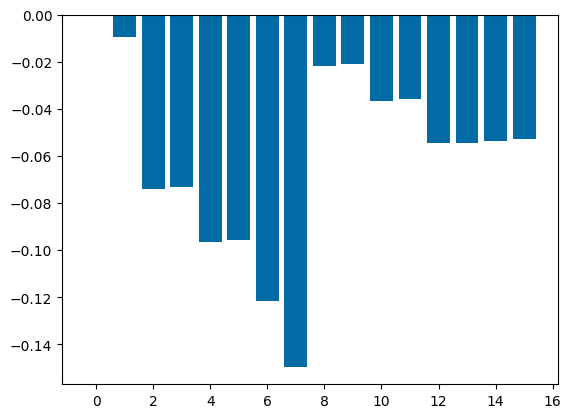

In [80]:
plt.bar(np.arange(len(initial_energy)),final_energy-initial_energy)

In [75]:
np.argsort(final_energy)

array([ 0,  1,  8,  9, 10, 11, 12, 13, 14, 15,  2,  3,  4,  5,  6,  7])

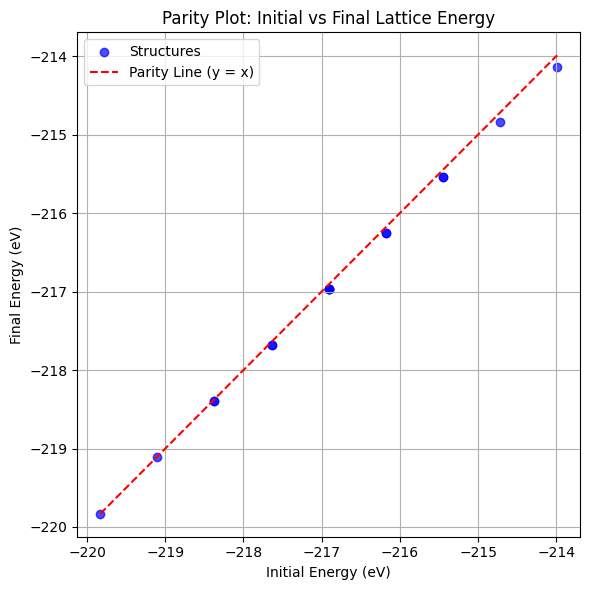

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Parity plot
plt.figure(figsize=(6, 6))
plt.scatter(initial_energy, final_energy, c='blue', alpha=0.7, label='Structures')

# Add y = x parity line
min_val = min(initial_energy.min(), final_energy.min())
max_val = max(initial_energy.max(), final_energy.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Parity Line (y = x)')

# Axis labels and formatting
plt.xlabel("Initial Energy (eV)")
plt.ylabel("Final Energy (eV)")
plt.title("Parity Plot: Initial vs Final Lattice Energy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()